## India's Air Quality Index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [4]:
df=pd.read_csv(r"C:\Users\ta\Downloads\archive (4)\city_day.csv")

In [5]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


Given features
PM2.5=Particulate Matter 2.5-micrometer in ug / m3
PM10=Particulate Matter 10-micrometer in ug / m3
NO=Nitric Oxide in ug / m3
NO2=Nitric Dioxide in ug / m3
NOx=Any Nitric x-oxide in ppb
NH3=Ammonia in ug / m3
CO=Carbon Monoxide in mg / m3
SO2=Sulphur Dioxide in ug / m3
O3=Ozone in ug / m3
AQI=Air Quality Index


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


There are 29531 rows and 16 columns in the data, all the values are not null and the three columns are of dtype object and 
others are of dtype float.

In [5]:
## To convert the object datatype into datetime form.
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In above output we got all the statistics about the data like mean, median, quantiles, min, max,etc.

In [7]:
## To check the null values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#### Exploratory data analysis

In [7]:
###  Missing values analysis

In [9]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['Air_quality']=df1['Air_quality'].fillna('Moderate')

In [10]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


<AxesSubplot:>

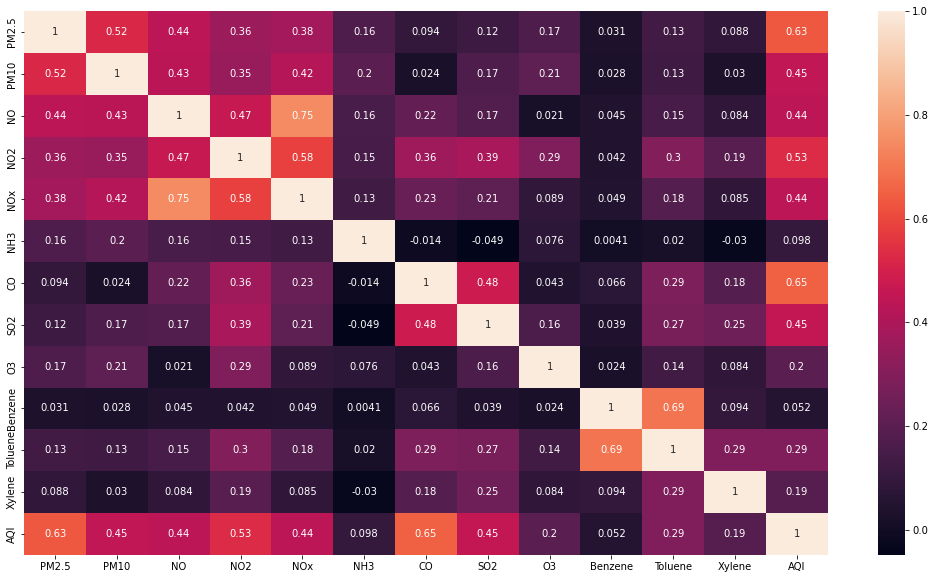

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True)

In [12]:
### TOP 10  city which higest PM 2.5
P=df1.groupby(['City']).count()['PM2.5']
P

City
Ahmedabad             2009
Aizawl                 113
Amaravati              951
Amritsar              1221
Bengaluru             2009
Bhopal                 289
Brajrajnagar           938
Chandigarh             304
Chennai               2009
Coimbatore             386
Delhi                 2009
Ernakulam              162
Gurugram              1679
Guwahati               502
Hyderabad             2006
Jaipur                1114
Jorapokhar            1169
Kochi                  162
Kolkata                814
Lucknow               2009
Mumbai                2009
Patna                 1858
Shillong               310
Talcher                925
Thiruvananthapuram    1112
Visakhapatnam         1462
Name: PM2.5, dtype: int64

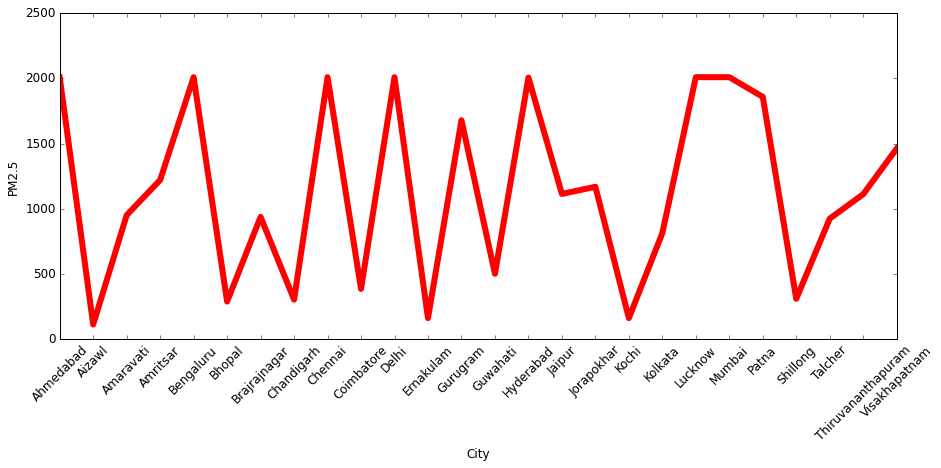

In [13]:
plt.figure(figsize=(15,6))
style.use('classic')
plt.plot(P,"r",linewidth=6,label="score",data=df1)
plt.xlabel("City")
plt.ylabel("PM2.5")
plt.xticks(rotation=45)
plt.show()

### PM2.5 component is maximum in most of the cities like Ahmedabad,Lucknow,Mumbai etc.

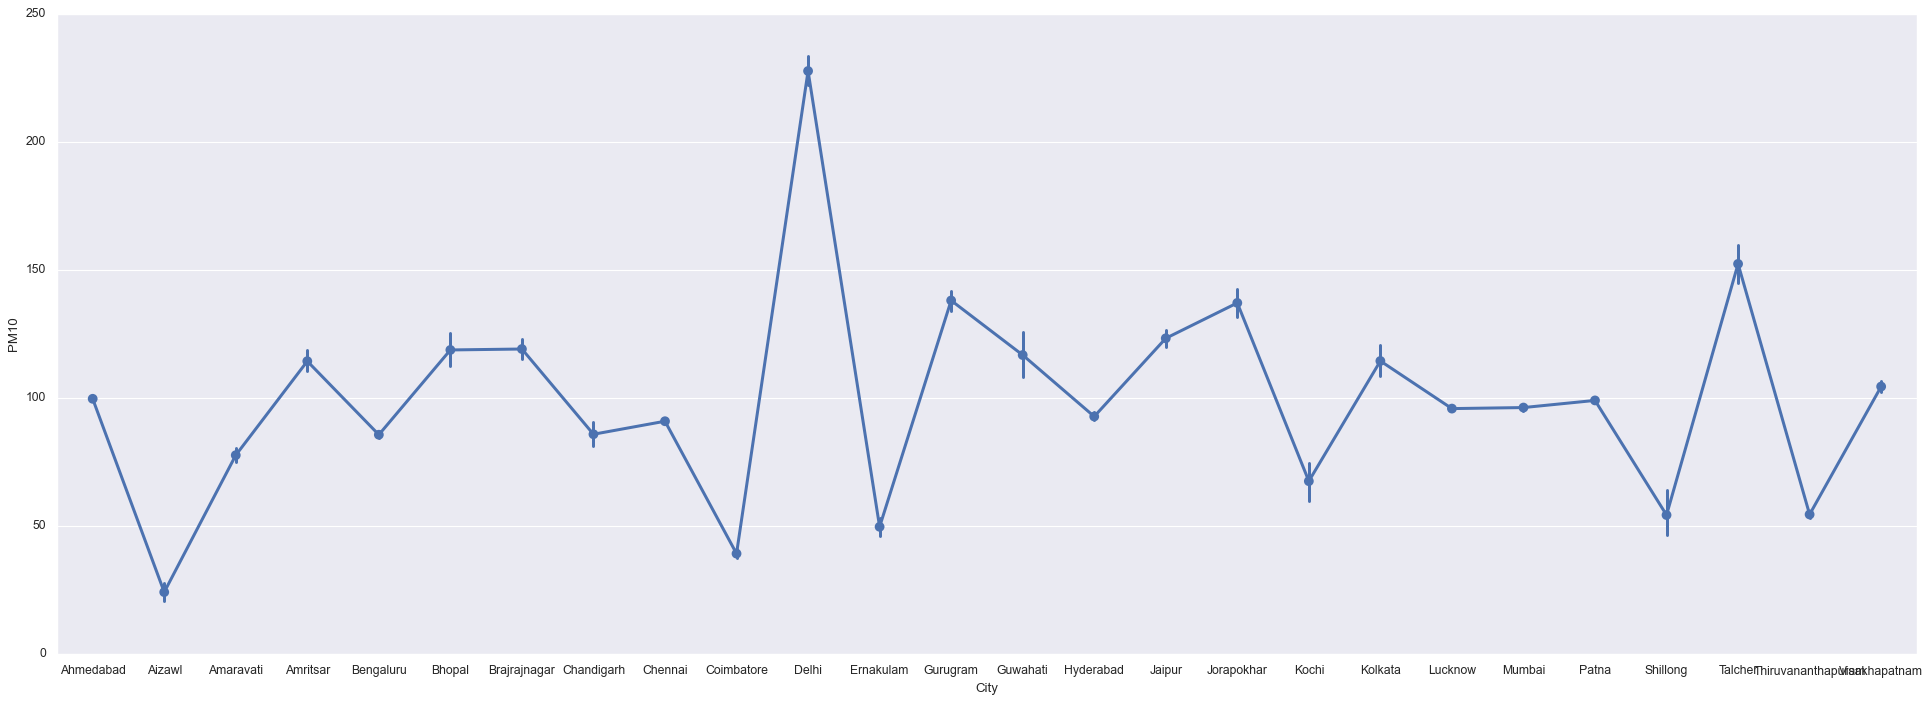

In [15]:
plt.figure(figsize = (30,10))
sns.set_theme(style="darkgrid")
sns.pointplot(x = 'City', y = 'PM10', data = df1)
plt.show()

### The PM10 component is maximum in delhi city

In [16]:
### Maximum and minimum NO  of each city
N1= df1.groupby(['City']).NO.agg([min, max]).reset_index()
N1

,City,min,max
0,Ahmedabad,0.06,175.81
1,Aizawl,2.90,20.36
2,Amaravati,0.25,43.76
3,Amritsar,0.40,103.44
4,Bengaluru,0.46,95.19
5,Bhopal,0.59,30.94
6,Brajrajnagar,0.02,390.68
7,Chandigarh,0.44,70.94
8,Chennai,1.76,59.44
9,Coimbatore,0.19,87.90


<AxesSubplot:xlabel='City', ylabel='max'>

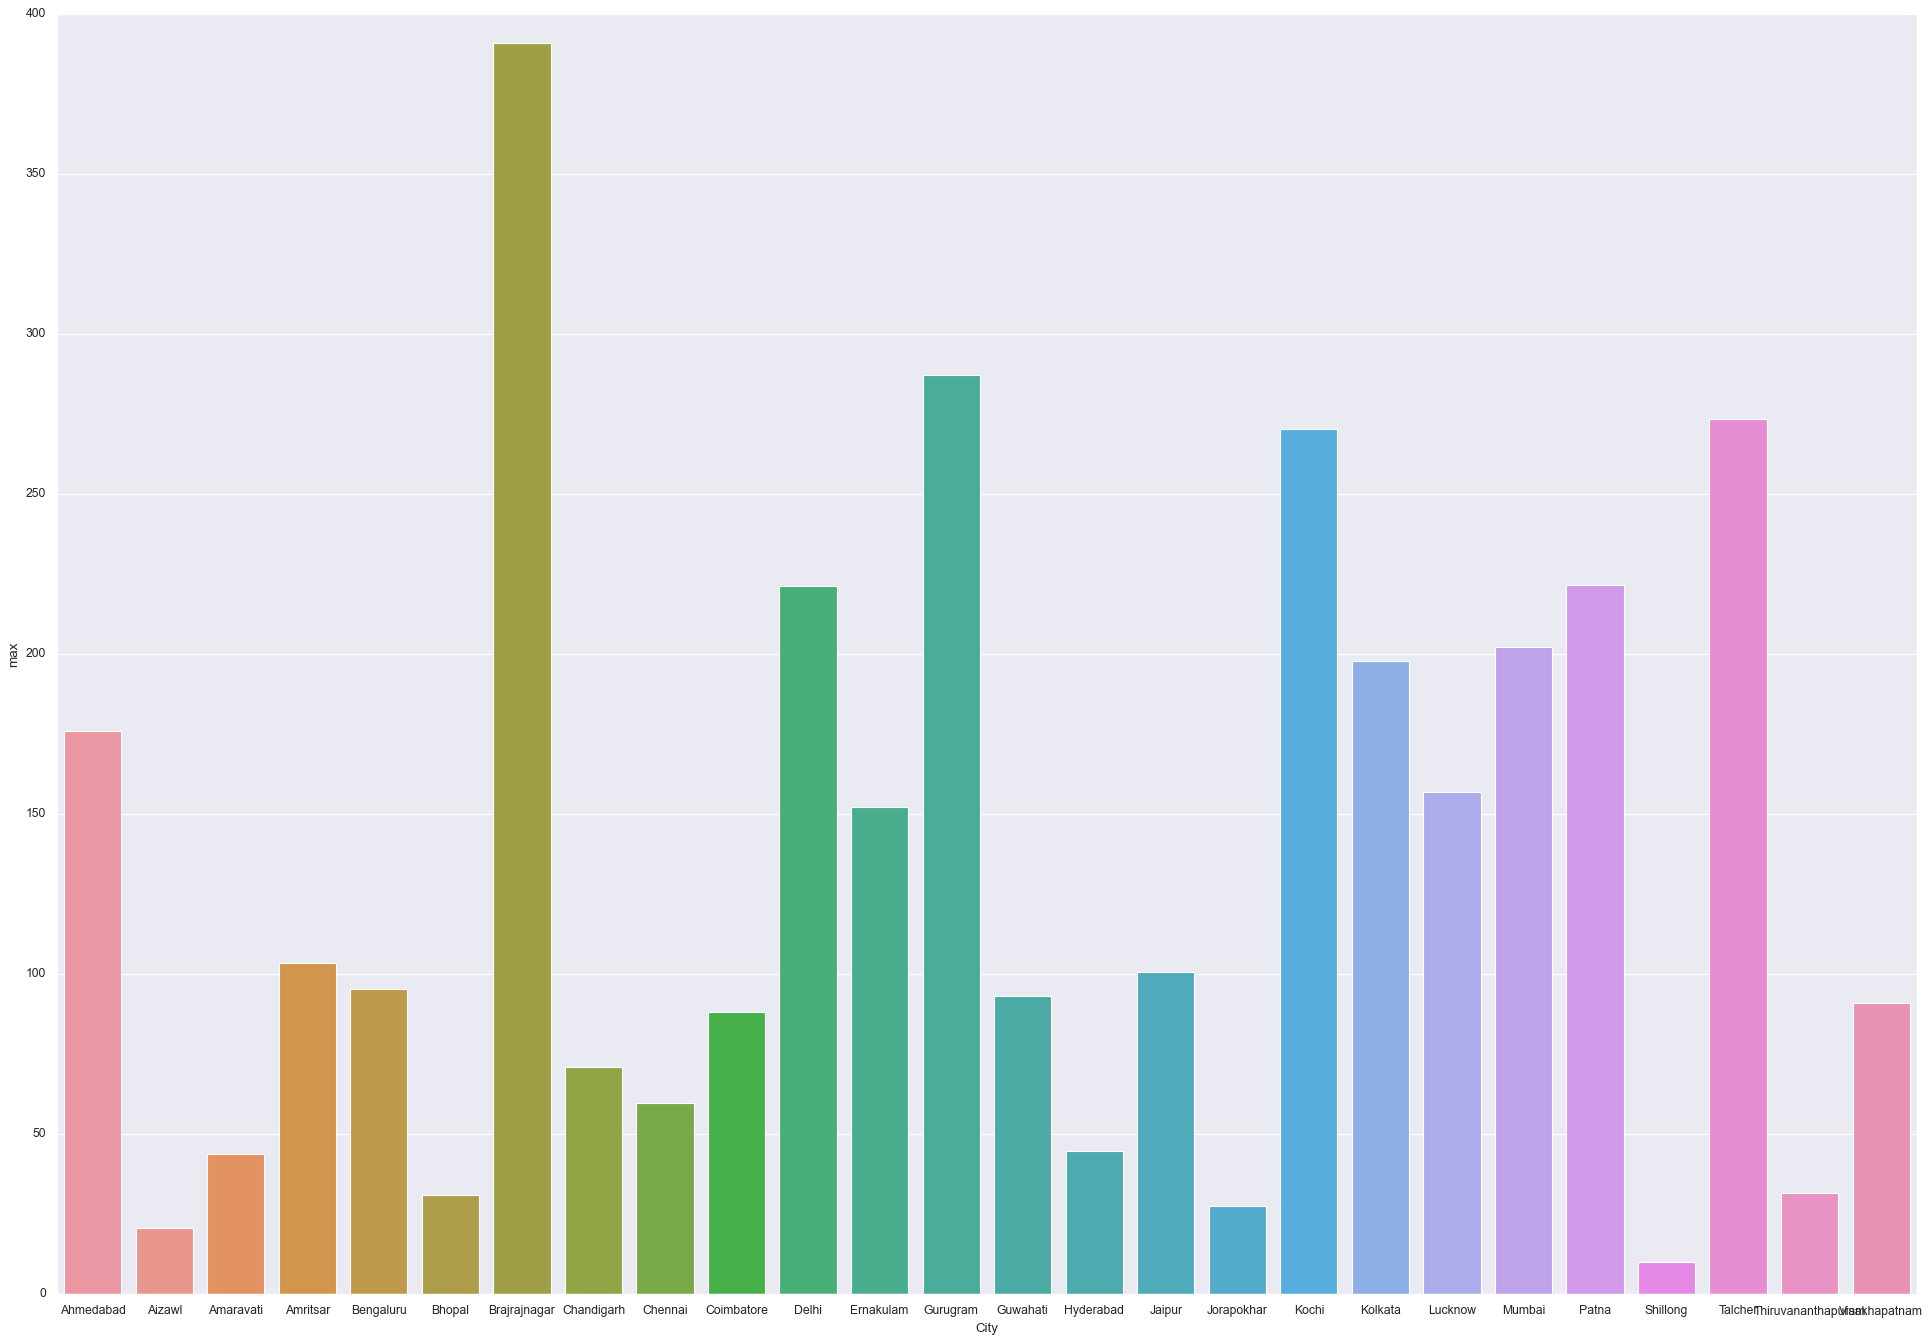

In [17]:
### maximum NO in city
plt.figure(figsize = (30,20))
sns.barplot(x = 'City' , y = 'max', data = N1)

### from above graph we see that Brajrajnagar has maximum amount of NO

In [18]:
co=df1.groupby(['City'])['Benzene'].mean()
co

City
Ahmedabad              4.369477
Aizawl                 8.649204
Amaravati              0.587708
Amritsar               3.685242
Bengaluru              2.937546
Bhopal                 1.070000
Brajrajnagar           4.146770
Chandigarh             5.065724
Chennai                1.618527
Coimbatore             0.017383
Delhi                  3.544480
Ernakulam              0.615185
Gurugram               1.551959
Guwahati               4.007948
Hyderabad              1.166810
Jaipur                 1.561275
Jorapokhar             1.070000
Kochi                  1.070000
Kolkata               10.857776
Lucknow                2.797860
Mumbai                 1.095615
Patna                  1.603332
Shillong              34.455258
Talcher                0.332486
Thiruvananthapuram     1.070000
Visakhapatnam          3.818016
Name: Benzene, dtype: float64

In [19]:
L=df1['City'].unique()

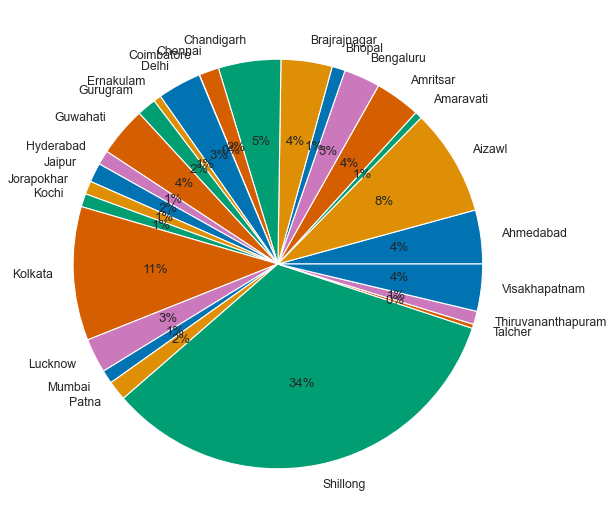

In [20]:
plt.figure(figsize=(10,8))
colors=sns.color_palette('colorblind')[0:5]
plt.pie(co,labels=L, data=df1,colors=colors,autopct='%.0f%%')
plt.show()

### We see that Shillong has the maximum amount of benzene (which is industrial component)

In [26]:
df1 = df.copy()
import datetime as dt
df1['year'] = df1['Date'].dt.year
df1['month'] =df1['Date'].dt.month
df1.drop('Date',axis=1,inplace=True)

In [27]:
df1['PM']=df1['PM2.5']+df1['PM10']
df1['Nitric']=df1['NO']+df1['NO2']+df1['NOx']
df1['BTX']=df1['Benzene']+df1['Toluene']+df1['Xylene']
cities_group=df1.groupby(['City','year','month'])[['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']].mean()


In [28]:
cities_group=cities_group.reset_index(['City','year','month'])
cities_group.head()

,City,year,month,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI
0,Ahmedabad,2015,1,NaN,91.401333,23.097333,NaN,46.350645,43.602903,6.971613,350.333333
1,Ahmedabad,2015,2,NaN,104.144000,21.820000,NaN,48.650400,63.194000,39.600000,520.640000
2,Ahmedabad,2015,3,NaN,83.193667,14.038333,NaN,45.752667,58.874333,42.736000,418.571429
3,Ahmedabad,2015,4,NaN,54.992667,7.306333,NaN,31.376000,51.233333,14.496333,308.640000
4,Ahmedabad,2015,5,NaN,50.607419,8.529677,NaN,31.624194,35.977419,19.677419,263.466667


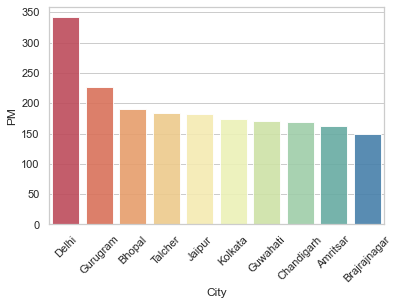

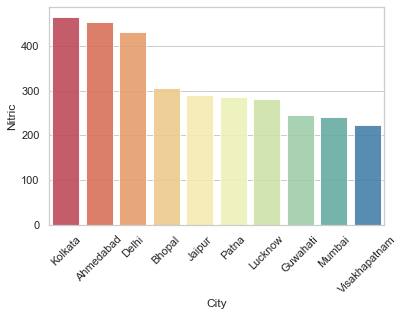

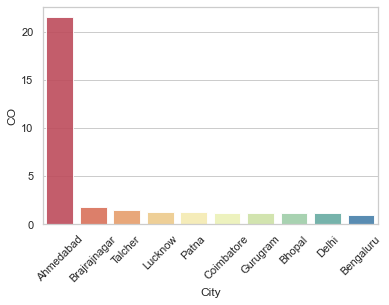

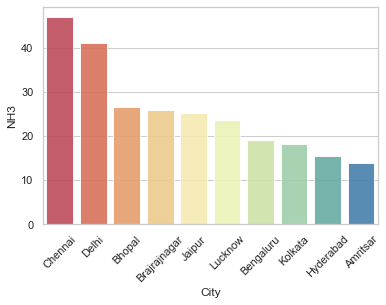

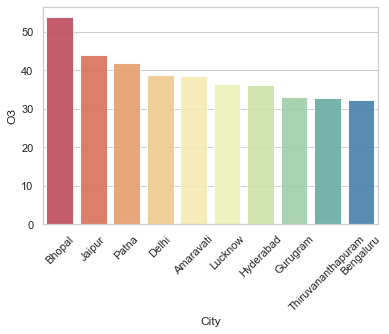

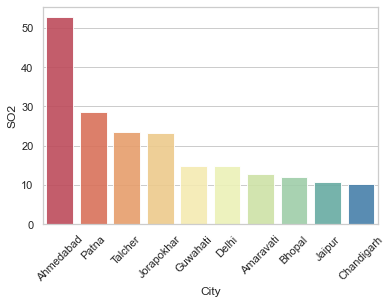

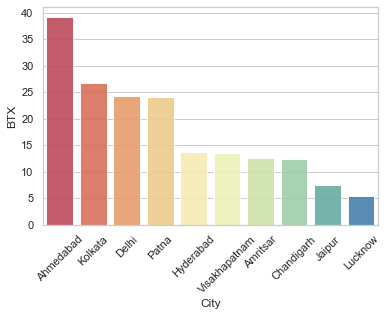

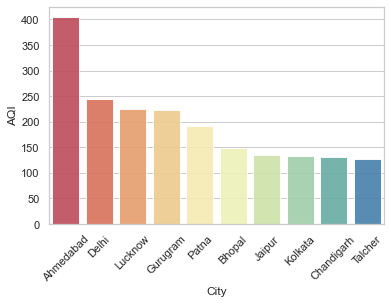

In [26]:
## plotting the top 10 most polluted cities for each category of pollutants
cities=cities_group[cities_group['year'].isin([2017,2018,2019])]
pollutants=['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']
sns.set_theme(style='whitegrid')

for i in pollutants:
    df=cities.groupby(['City'])[[i]].mean().sort_values(i,ascending=False).iloc[:10,:]
    
    df=df.reset_index(['City'])

    plt.figure()
    sns.barplot(data=df, x="City", y=i, palette="Spectral", alpha=.9)
    plt.xticks(rotation=45) 

### From above graphs we say that Ahmedabad,Delhi,Kolkata,Gurugram,Bhopal are top polluted cities.

In [23]:
df1 = df.copy()
import datetime as dt
df1['year'] = df1['Date'].dt.year
df1['month'] =df1['Date'].dt.month
df1.drop('Date',axis=1,inplace=True)

In [32]:
x1 = df1[['City','AQI','year']].groupby(['City','year']).mean().sort_values(['AQI']).reset_index()
x1

,City,year,AQI
0,Aizawl,2020,24.0
1,Amaravati,2020,54.0
2,Thiruvananthapuram,2020,64.0
3,Shillong,2020,65.0
4,Thiruvananthapuram,2017,68.0
...,...,...,...
98,Delhi,2016,292.5
99,Gurugram,2017,294.0
100,Delhi,2015,303.0
101,Ahmedabad,2019,446.0


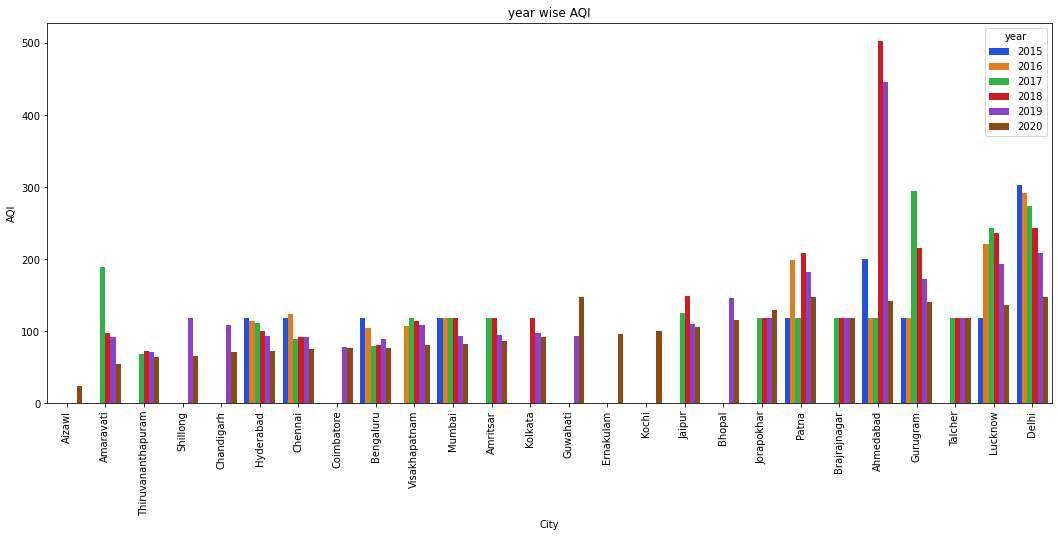

In [33]:
plt.figure(figsize=(18,7))
sns.barplot(x='City', y='AQI', data=x1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()

### The plot shows a huge spike in the AQI for the city of Ahmedabad during the years 2018 & 2019.

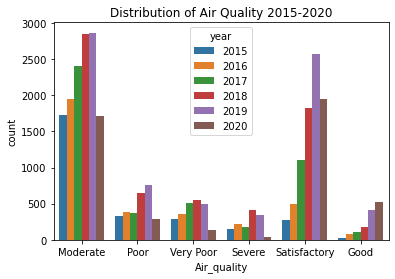

In [47]:
plt.title('Distribution of Air Quality 2015-2020')
sns.countplot(x='Air_quality', data=df1, hue='year');


#### Overall we see we have a large number of Moderate and Satisfactory bucket counts which is a good thing and low number of Poor and Severe buckets over 2015-2020.
#### If we observe carefully, 2019 has highest Moderate and Satisfactory buckets which can be explained by lower pollution levels by the lockdown.
#### And as compared to the previous years 2018 & 2019, for all the buckets we see a steep decline in 2020, and in case of "Good" bucket - higher number than previous years which can be seen as a positive sign.

### Hypothesis Testing

In [44]:
df2 = df.copy()
df2= df2[df2['Date'] > ('01-01-2020')] 
df2['Vehicular Pollution content'] = df2['PM2.5']+df2['PM10']+df2['NO']+df2['NO2']+df2['NOx']+df2['NH3']+df2['CO']
df2['Industrial Pollution content'] = df2['SO2']+df2['O3']+df2['Benzene']+df2['Toluene']+df2['Xylene']
df2= df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          29531 non-null  object 
 1   Date                          29531 non-null  object 
 2   AQI                           24850 non-null  float64
 3   Air_quality                   24850 non-null  object 
 4   Vehicular Pollution content   14729 non-null  float64
 5   Industrial Pollution content  9476 non-null   float64
dtypes: float64(3), object(3)
memory usage: 1.6+ MB


In [47]:
df2

,City,Date,AQI,Air_quality,Vehicular Pollution content,Industrial Pollution content
0,Ahmedabad,2015-01-01,0.0,0,0.00,161.02
1,Ahmedabad,2015-01-02,0.0,0,0.00,71.56
2,Ahmedabad,2015-01-03,0.0,0,0.00,85.22
3,Ahmedabad,2015-01-04,0.0,0,0.00,70.24
4,Ahmedabad,2015-01-05,0.0,0,0.00,107.32
...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,41.0,Good,131.18,46.89
29527,Visakhapatnam,2020-06-28,70.0,Satisfactory,156.99,46.19
29528,Visakhapatnam,2020-06-29,68.0,Satisfactory,151.14,39.40
29529,Visakhapatnam,2020-06-30,54.0,Satisfactory,129.27,38.14


In [46]:
df2.fillna(0,inplace=True)

In [48]:
from statsmodels.stats import weightstats 
import scipy.stats as stats

In [ ]:
H0:The mean of vehicular content and industrial content are same.
H1:The mean of vehicular content and industrial content are not same.

In [50]:
n1=df2['Vehicular Pollution content']
n2=df2['Industrial Pollution content']

In [51]:
weightstats.ztest(n1, n2)

(95.90597168116956, 0.0)

In [52]:
if 0.0<0.05:
    print('Reject H0')
else:
    print("Accept H0")

Reject H0


In [ ]:
## The mean of vehicular content and industrial content are not same.

In [ ]:
# H0: difference in mean not larger than the value(zero)
# H1: difference in mean larger than the value

In [57]:
weightstats.ztest(n1, n2,alternative='larger')

(95.90597168116956, 0.0)

In [58]:
if 0.0<0.05:
    print('Reject H0')
else:
    print("Accept H0")

Reject H0


In [ ]:
## Difference in mean is larger than the value(zero)

### Applying Model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter

In [62]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['Air_quality']=le.fit_transform(df1['Air_quality'].astype(str))
df1.info()

categorical_attributes ['City', 'Date', 'Air_quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  int32  
 1   Date         29531 non-null  object 
 2   PM2.5        29531 non-null  float64
 3   PM10         29531 non-null  float64
 4   NO           29531 non-null  float64
 5   NO2          29531 non-null  float64
 6   NOx          29531 non-null  float64
 7   NH3          29531 non-null  float64
 8   CO           29531 non-null  float64
 9   SO2          29531 non-null  float64
 10  O3           29531 non-null  float64
 11  Benzene      29531 non-null  float64
 12  Toluene      29531 non-null  float64
 13  Xylene       29531 non-null  float64
 14  AQI          29531 non-null  float64
 15  Air_quality  29531 non-null  int32  
dtypes: float64(13), int32(2), object(1)
memory usage: 3.4+ MB


In [63]:
y = df1["Air_quality"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#### Data Imbalance:

Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [64]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({1: 9393, 5: 9393, 3: 9393, 0: 9393, 2: 9393, 4: 9393})


### ~~ Classification

### 1) Random Forest

In [101]:
clf = RandomForestClassifier(random_state=42)

In [102]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("confussion matrix")
print(conf_mat)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4117    0    0    0    0]
 [   0    0  838    0    0    3]
 [   0    0    0 2425    0    0]
 [   0    0    1    0  377    3]
 [   0    0    0    0    1  702]]


In [103]:
acc_RF=metrics.accuracy_score(y_test, y_pred)

In [104]:
acc_RF

0.9990970654627539

### 2) Support Vector Machine

In [105]:
cls=SVC()
cls.fit(X_train,y_train)

SVC()

In [106]:
svm_pred=cls.predict(X_test)
svm_pred

array([5, 1, 1, ..., 3, 1, 2])

In [107]:
cm=confusion_matrix(y_test,svm_pred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svm_pred)
print("accuracy",accuracy)

confussion matrix
[[ 352    0    0   41    0    0]
 [   0 4101    3   13    0    0]
 [   0   15  809    0    0   17]
 [   2   16    0 2407    0    0]
 [   0    0    0    0  364   17]
 [   0    0    4    0    6  693]]


accuracy 0.9848758465011287


### 3) Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [67]:
dt = DecisionTreeClassifier()

In [68]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
y_pred = dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

1.0

In [72]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
features

['City',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

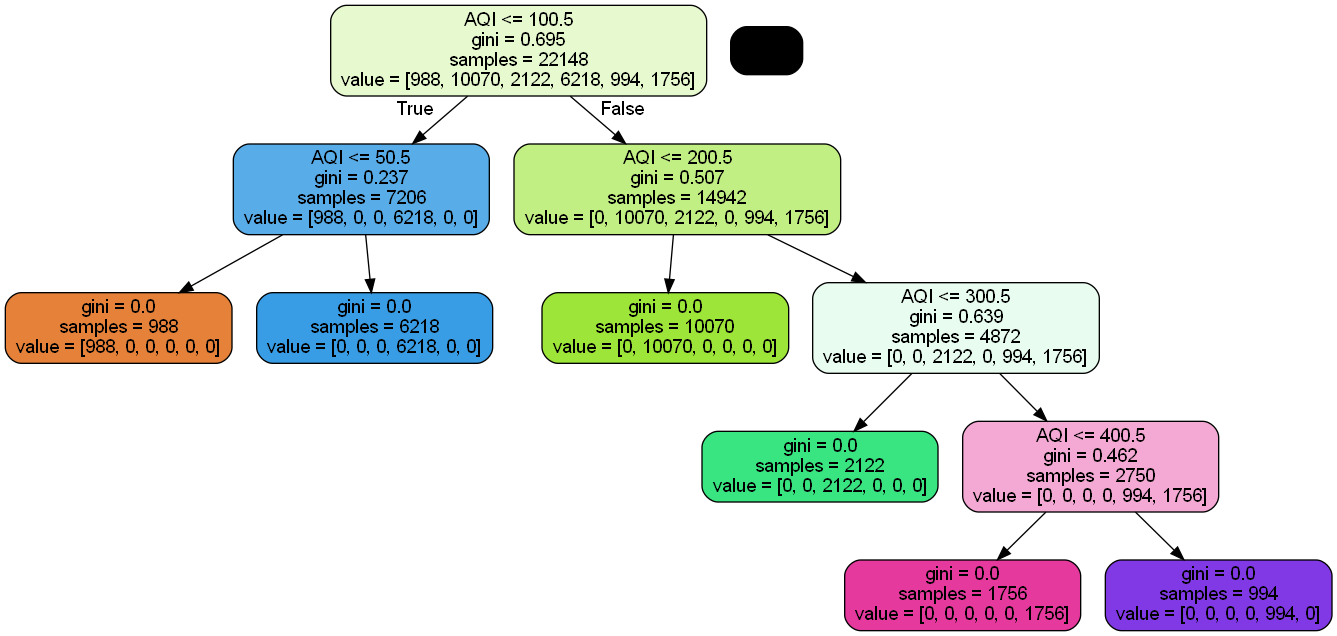

In [73]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### 4) XGBoost

In [109]:
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)

In [110]:
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)

In [111]:
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)

In [112]:
accuracy

1.0

In [113]:
algorithm=['Random Forest','SVM_clf','DT_clf','XGBoost']
accuracy=[0.9995,0.98487,1,1]
Accu=pd.DataFrame(accuracy,algorithm)
Accu

,0
Random Forest,0.99950
SVM_clf,0.98487
DT_clf,1.00000
XGBoost,1.00000


### Conclusion

1. Vehicular pollution contents are more related to air quality index.
2. Delhi is the most polluted city in terms of vehicular pollution contents.
3. Ahemdabad is the most polluted city in terms of industrial pollution content.
4. After COVID19 pandemic there is gradual dicrease in vehicular pollution contents, industrial pollution content.
5. Extra Gradient Boost classifier 100% accurately classify the target variable.
6. Decision tree also 100% classify the target variable

### Time series analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
## To be able to construct time plots, we need to first convert the Date column into a DateTime format.

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [4]:
## filling missing values by zero
df.fillna(0,inplace=True)

In [7]:
#extracting year and month for each record
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

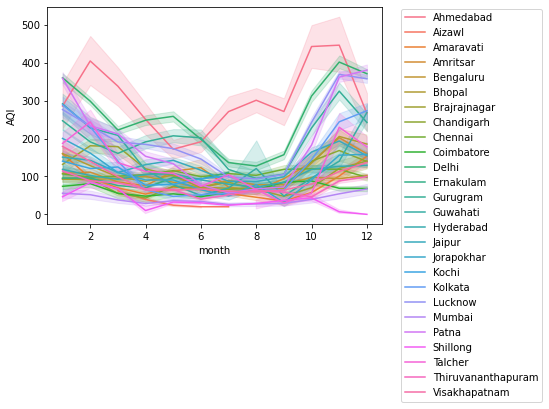

In [15]:
## df_AQI_trend= cities_17_19.groupby(['City','month'])[['AQI']].mean().reset_index()

sns.lineplot(data=df,x="month", y="AQI",hue='City')
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0.2)

In [ ]:
## We see that, AQI decreases in the summer months, which in turn means that air quality improves over these months.

-We pivot the values from the 'City' column, so that we can have a comparitive view of the value of every city's AQI through
every day.
-Then we resample them to find the mean of every month, so now our dataset contains month-wise data.

In [8]:
cities_all = df.pivot_table(values='AQI', index=['Date'], columns='City')
cities_all=cities_all.add_suffix('_AQI')
cities=cities_all.resample(rule='MS').mean()
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,33.903226,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
2015-02-01,464.857143,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
2015-03-01,378.064516,NaN,NaN,NaN,46.322581,NaN,NaN,NaN,58.677419,NaN,...,NaN,NaN,NaN,93.774194,0.0,NaN,NaN,NaN,NaN,NaN
2015-04-01,257.200000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,170.000000,NaN,...,NaN,NaN,NaN,114.633333,0.0,NaN,NaN,NaN,NaN,NaN
2015-05-01,254.967742,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,NaN,137.000000,0.0,NaN,NaN,NaN,NaN,NaN


In [9]:
#form a new column containing India's AQI for every month by taking the average of all cities for that month
cities['India_AQI']=cities.mean(axis=1)
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,33.903226,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,53.741935
2015-02-01,464.857143,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,113.255102
2015-03-01,378.064516,NaN,NaN,NaN,46.322581,NaN,NaN,NaN,58.677419,NaN,...,NaN,NaN,93.774194,0.0,NaN,NaN,NaN,NaN,NaN,119.539171
2015-04-01,257.200000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,170.000000,NaN,...,NaN,NaN,114.633333,0.0,NaN,NaN,NaN,NaN,NaN,154.695238
2015-05-01,254.967742,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,137.000000,0.0,NaN,NaN,NaN,NaN,NaN,164.691244


<AxesSubplot:xlabel='Date'>

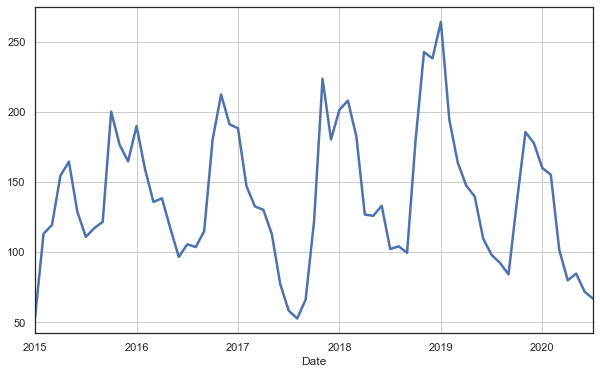

In [14]:
cities.reset_index()

sns.set_theme(style='white',color_codes=True)
cities['India_AQI'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)

From the above plot, we can visually see that there is a slight downward trend and a seasonality present. However, we will decompose the plot into trend, seasonality and residuals to get a clearer picture.

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

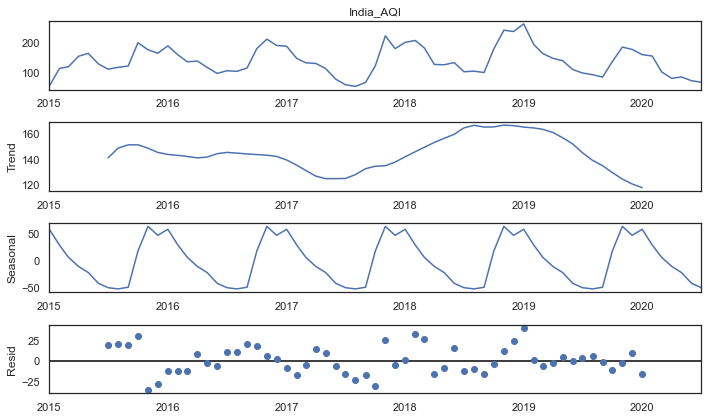

In [17]:
plt.rcParams['figure.figsize'] = (10, 6);
cities['India_AQI']=cities.mean(axis=1)
fig = seasonal_decompose(cities['India_AQI'], model='additive').plot()

In [ ]:
We can see a clear seasonality and trend present here. The AQI decreases towards mid-year before rising again.

### Augmented Dicky Fuller Test:
We'll perform the ADF for determining stationarity of the time series.

In [ ]:
## H0: there is no stationarity in the given data
## H1: there is stationarity in given data 

In [18]:
dftest = adfuller(cities['India_AQI'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -5.029590
p-value                         0.000019
#Lags Used                      3.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64

In [ ]:
## We can use auto-arima to determine the parameters of the SARIMA model.

In [19]:
!pip install pmdarima

In [20]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [48]:
auto_arima(y=cities['India_AQI'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=\
           True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -316.454
Date:                            Wed, 08 Feb 2023   AIC                            640.908
Time:                                    16:00:03   BIC                            649.727
Sample:                                01-01-2015   HQIC                           644.397
                                     - 07-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.3076      5.859      2.101      0.036       0.824      23.791
ar.L1          0.7742      0.063     12.300      0.000       0.651       0.898
ar.S.L12       0.5578      0.101      5.529      0.000       0.360       0.756
sigma2       683.5563    115.855      5.900      0.000     456.484     910.629
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 4.69
Prob(Q):                              0.68   Prob(JB):                         0.10
Heteroskedasticity (H):               0.83   Skew:                             0.61
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
test_data=cities['India_AQI'][:'2019-12']
test_data

Date
2015-01-01     53.741935
2015-02-01    113.255102
2015-03-01    119.539171
2015-04-01    154.695238
2015-05-01    164.691244
2015-06-01    128.887500
2015-07-01    111.012097
2015-08-01    117.245968
2015-09-01    121.737500
2015-10-01    200.338710
2015-11-01    176.700000
2015-12-01    164.856631
2016-01-01    190.053763
2016-02-01    159.505747
2016-03-01    135.946237
2016-04-01    138.555556
2016-05-01    117.107527
2016-06-01     96.703704
2016-07-01    105.751613
2016-08-01    103.741935
2016-09-01    115.093333
2016-10-01    180.419355
2016-11-01    212.626667
2016-12-01    191.290323
2017-01-01    188.512903
2017-02-01    147.321429
2017-03-01    132.730205
2017-04-01    130.321970
2017-05-01    113.123656
2017-06-01     77.267647
2017-07-01     58.410138
2017-08-01     52.836406
2017-09-01     66.230952
2017-10-01    122.301843
2017-11-01    223.810476
2017-12-01    180.491917
2018-01-01    201.692600
2018-02-01    208.189076
2018-03-01    182.667932
2018-04-01    126.96

In [52]:
#dividing into train and test:
train_data=cities['India_AQI'][:'2018-12']
test_data=cities['India_AQI'][:'2019-12']

#Building the model:
model=SARIMAX(train_data,order=(0,0,0),seasonal_order=(1,0,0,12), trend='n')
results=model.fit()

#printing summry of model reults
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                India_AQI   No. Observations:                   48
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                -262.187
Date:                  Wed, 08 Feb 2023   AIC                            528.374
Time:                          16:00:56   BIC                            532.116
Sample:                      01-01-2015   HQIC                           529.788
                           - 12-01-2018                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9647      0.038     25.353      0.000       0.890       1.039
sigma2      1667.7563    301.907      5.524      0.000    1076.029    2259.483
===================================================================================
Ljung-Box (L1) (Q):                  20.50   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.00   Prob(JB):                         0.28
Heteroskedasticity (H):               0.81   Skew:                             0.26
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

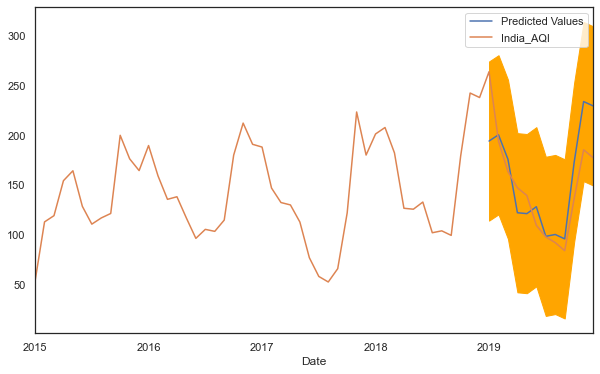

In [53]:
fig, ax= plt.subplots(figsize=(10,6))

#predict the next 12 months values to compare with the test dataset
forecasts = results.get_forecast(steps=12, dynamic=True)
confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']
#plot the forecasted mean data for the next 12 months and the confidence interval
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='orange')

#plotting the actual value from test data
test_data.plot(legend=True, ax=ax)

In [54]:
from sklearn.metrics import mean_squared_error

test= cities['India_AQI']['2019-01':'2019-12']
RMSE=np.sqrt(mean_squared_error(forecasts.predicted_mean,test))
print('RMSE = ',RMSE)

y_true=test
y_pred= forecasts.predicted_mean
mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE = ', mape)

RMSE =  32.883128184683166
MAPE =  15.82382225996236


#### We see that the model has an RMSE of 32.88 on the test data set. Now, we can use this model to predict values into the future.

#### We'll be forecastig AQI values for 2021. However, 2020 yielded unexpected AQI values owing to the lockdown imposed due to COVID-19, as we saw earlier. So our prediction might have a wider margin of error to be considered.

<AxesSubplot:xlabel='Date'>

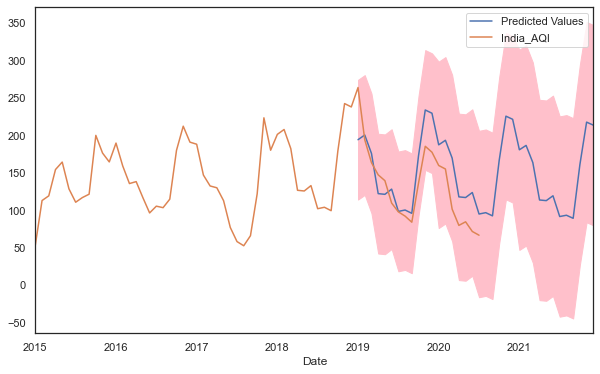

In [55]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts = results.get_forecast(steps=36, dynamic=True)

confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']

#plot the forecasted data
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')

#plot the confidence interval as the shaded area
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#Plot India's AQI Data
cities['India_AQI'].plot(legend=True, ax=ax)

In [ ]:
## these are our forcasted values for three years